In [1]:
from   config            import plotly_id, plotly_key
import plotly
import plotly.plotly     as py
import plotly.graph_objs as go
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

# Exploratory Data Analysis

In [2]:
medals = pd.read_pickle('../dat/medals.pkl')
medals.head()

,Year,Summer,Games,Host,NOC,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
0,1896,1,1896 Summer,0,AUS,5,0,2,5,3,2,0,1
1,1896,1,1896 Summer,0,AUT,8,0,3,8,5,2,1,2
2,1896,1,1896 Summer,0,DEN,15,0,5,12,6,1,2,3
3,1896,1,1896 Summer,0,FRA,26,0,6,18,11,5,4,2
4,1896,1,1896 Summer,0,GBR,25,0,7,19,9,3,3,3


In [3]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 13 columns):
Year        3837 non-null int64
Summer      3837 non-null int64
Games       3837 non-null object
Host        3837 non-null int64
NOC         3837 non-null object
Athletes    3837 non-null int64
Females     3837 non-null int64
Sports      3837 non-null int64
Events      3837 non-null int64
Medals      3837 non-null int64
Golds       3837 non-null int64
Silvers     3837 non-null int64
Bronzes     3837 non-null int64
dtypes: int64(11), object(2)
memory usage: 389.8+ KB


In [4]:
medals.describe()

,Year,Summer,Host,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
count,3837.000000,3837.000000,3837.00000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000
mean,1981.898879,0.732343,0.01251,70.658327,19.421944,6.980975,29.816523,10.368256,3.485014,3.418296,3.464947
std,28.381436,0.442795,0.11116,117.075901,42.536103,6.380562,41.565980,30.349213,12.782128,10.293752,9.765239
min,1896.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1964.000000,0.000000,0.00000,7.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1988.000000,1.000000,0.00000,22.000000,3.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000
75%,2004.000000,1.000000,0.00000,80.000000,17.000000,10.000000,36.000000,6.000000,1.000000,1.000000,2.000000
max,2016.000000,1.000000,1.00000,1109.000000,369.000000,34.000000,270.000000,442.000000,187.000000,141.000000,126.000000


In [6]:
medals.columns

Index(['Year', 'Summer', 'Games', 'Host', 'NOC', 'Athletes', 'Females',
       'Sports', 'Events', 'Medals', 'Golds', 'Silvers', 'Bronzes'],
      dtype='object')

In [21]:
hover_text = []
color_range = []
for index, row in medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Host: {host}<br>'+
                       'Nation: {noc}<br>'+
                       'Athletes: {athletes}<br>'+
                       'Females: {females}<br>'+
                       'Sports: {sports}<br>'+
                       'Events: {events}<br>'+
                       'Medals: {medals}<br>'+
                       'Golds: {golds}<br>'+
                       'Silvers: {silvers}<br>'+
                       'Bronzes: {bronzes}').format(games    = row['Games'],
                                                    host     = row['Host'],
                                                    noc      = row['NOC'],
                                                    athletes = row['Athletes'],
                                                    females  = row['Females'],
                                                    sports   = row['Sports'],
                                                    events   = row['Events'],
                                                    medals   = row['Medals'],
                                                    golds    = row['Golds'],
                                                    silvers  = row['Silvers'],
                                                    bronzes  = row['Bronzes']))
    color_range.append(max(row['Athletes'],100))

trace0 = go.Scatter(
    x      = medals['Events'],
    y      = medals['Medals'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
#        size          = medals['Athletes'],
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Athletes'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Historic Medal Table of the Olympic Games',
    xaxis = dict(
        title         = 'Total Number of Events Participated',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Medals Won',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'historic-olympic-medals')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [10]:
medals['Games'].unique()

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

In [12]:
rio_2016_medals = medals[medals['Games'] == '2016 Summer']
rio_2016_medals.head()

,Year,Summer,Games,Host,NOC,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
3630,2016,1,2016 Summer,0,AFG,3,1,2,3,0,0,0,0
3631,2016,1,2016 Summer,0,ALB,6,3,3,6,0,0,0,0
3632,2016,1,2016 Summer,0,ALG,74,13,13,48,2,0,2,0
3633,2016,1,2016 Summer,0,AND,4,2,4,4,0,0,0,0
3634,2016,1,2016 Summer,0,ANG,26,18,7,10,0,0,0,0


In [22]:
hover_text = []
color_range = []
for index, row in rio_2016_medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Host: {host}<br>'+
                       'Nation: {noc}<br>'+
                       'Athletes: {athletes}<br>'+
                       'Females: {females}<br>'+
                       'Sports: {sports}<br>'+
                       'Events: {events}<br>'+
                       'Medals: {medals}<br>'+
                       'Golds: {golds}<br>'+
                       'Silvers: {silvers}<br>'+
                       'Bronzes: {bronzes}').format(games    = row['Games'],
                                                    host     = row['Host'],
                                                    noc      = row['NOC'],
                                                    athletes = row['Athletes'],
                                                    females  = row['Females'],
                                                    sports   = row['Sports'],
                                                    events   = row['Events'],
                                                    medals   = row['Medals'],
                                                    golds    = row['Golds'],
                                                    silvers  = row['Silvers'],
                                                    bronzes  = row['Bronzes']))
    color_range.append(max(row['Athletes'],100))

trace0 = go.Scatter(
    x      = rio_2016_medals['Events'],
    y      = rio_2016_medals['Medals'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
#        size          = rio_2016_medals['Athletes'],
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Athletes'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Medal Table of the Rio 2016 Summer Olympic Games',
    xaxis = dict(
        title         = 'Total Number of Events Participated',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Medals Won',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'rio-2016-olympic-medals')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Correlation

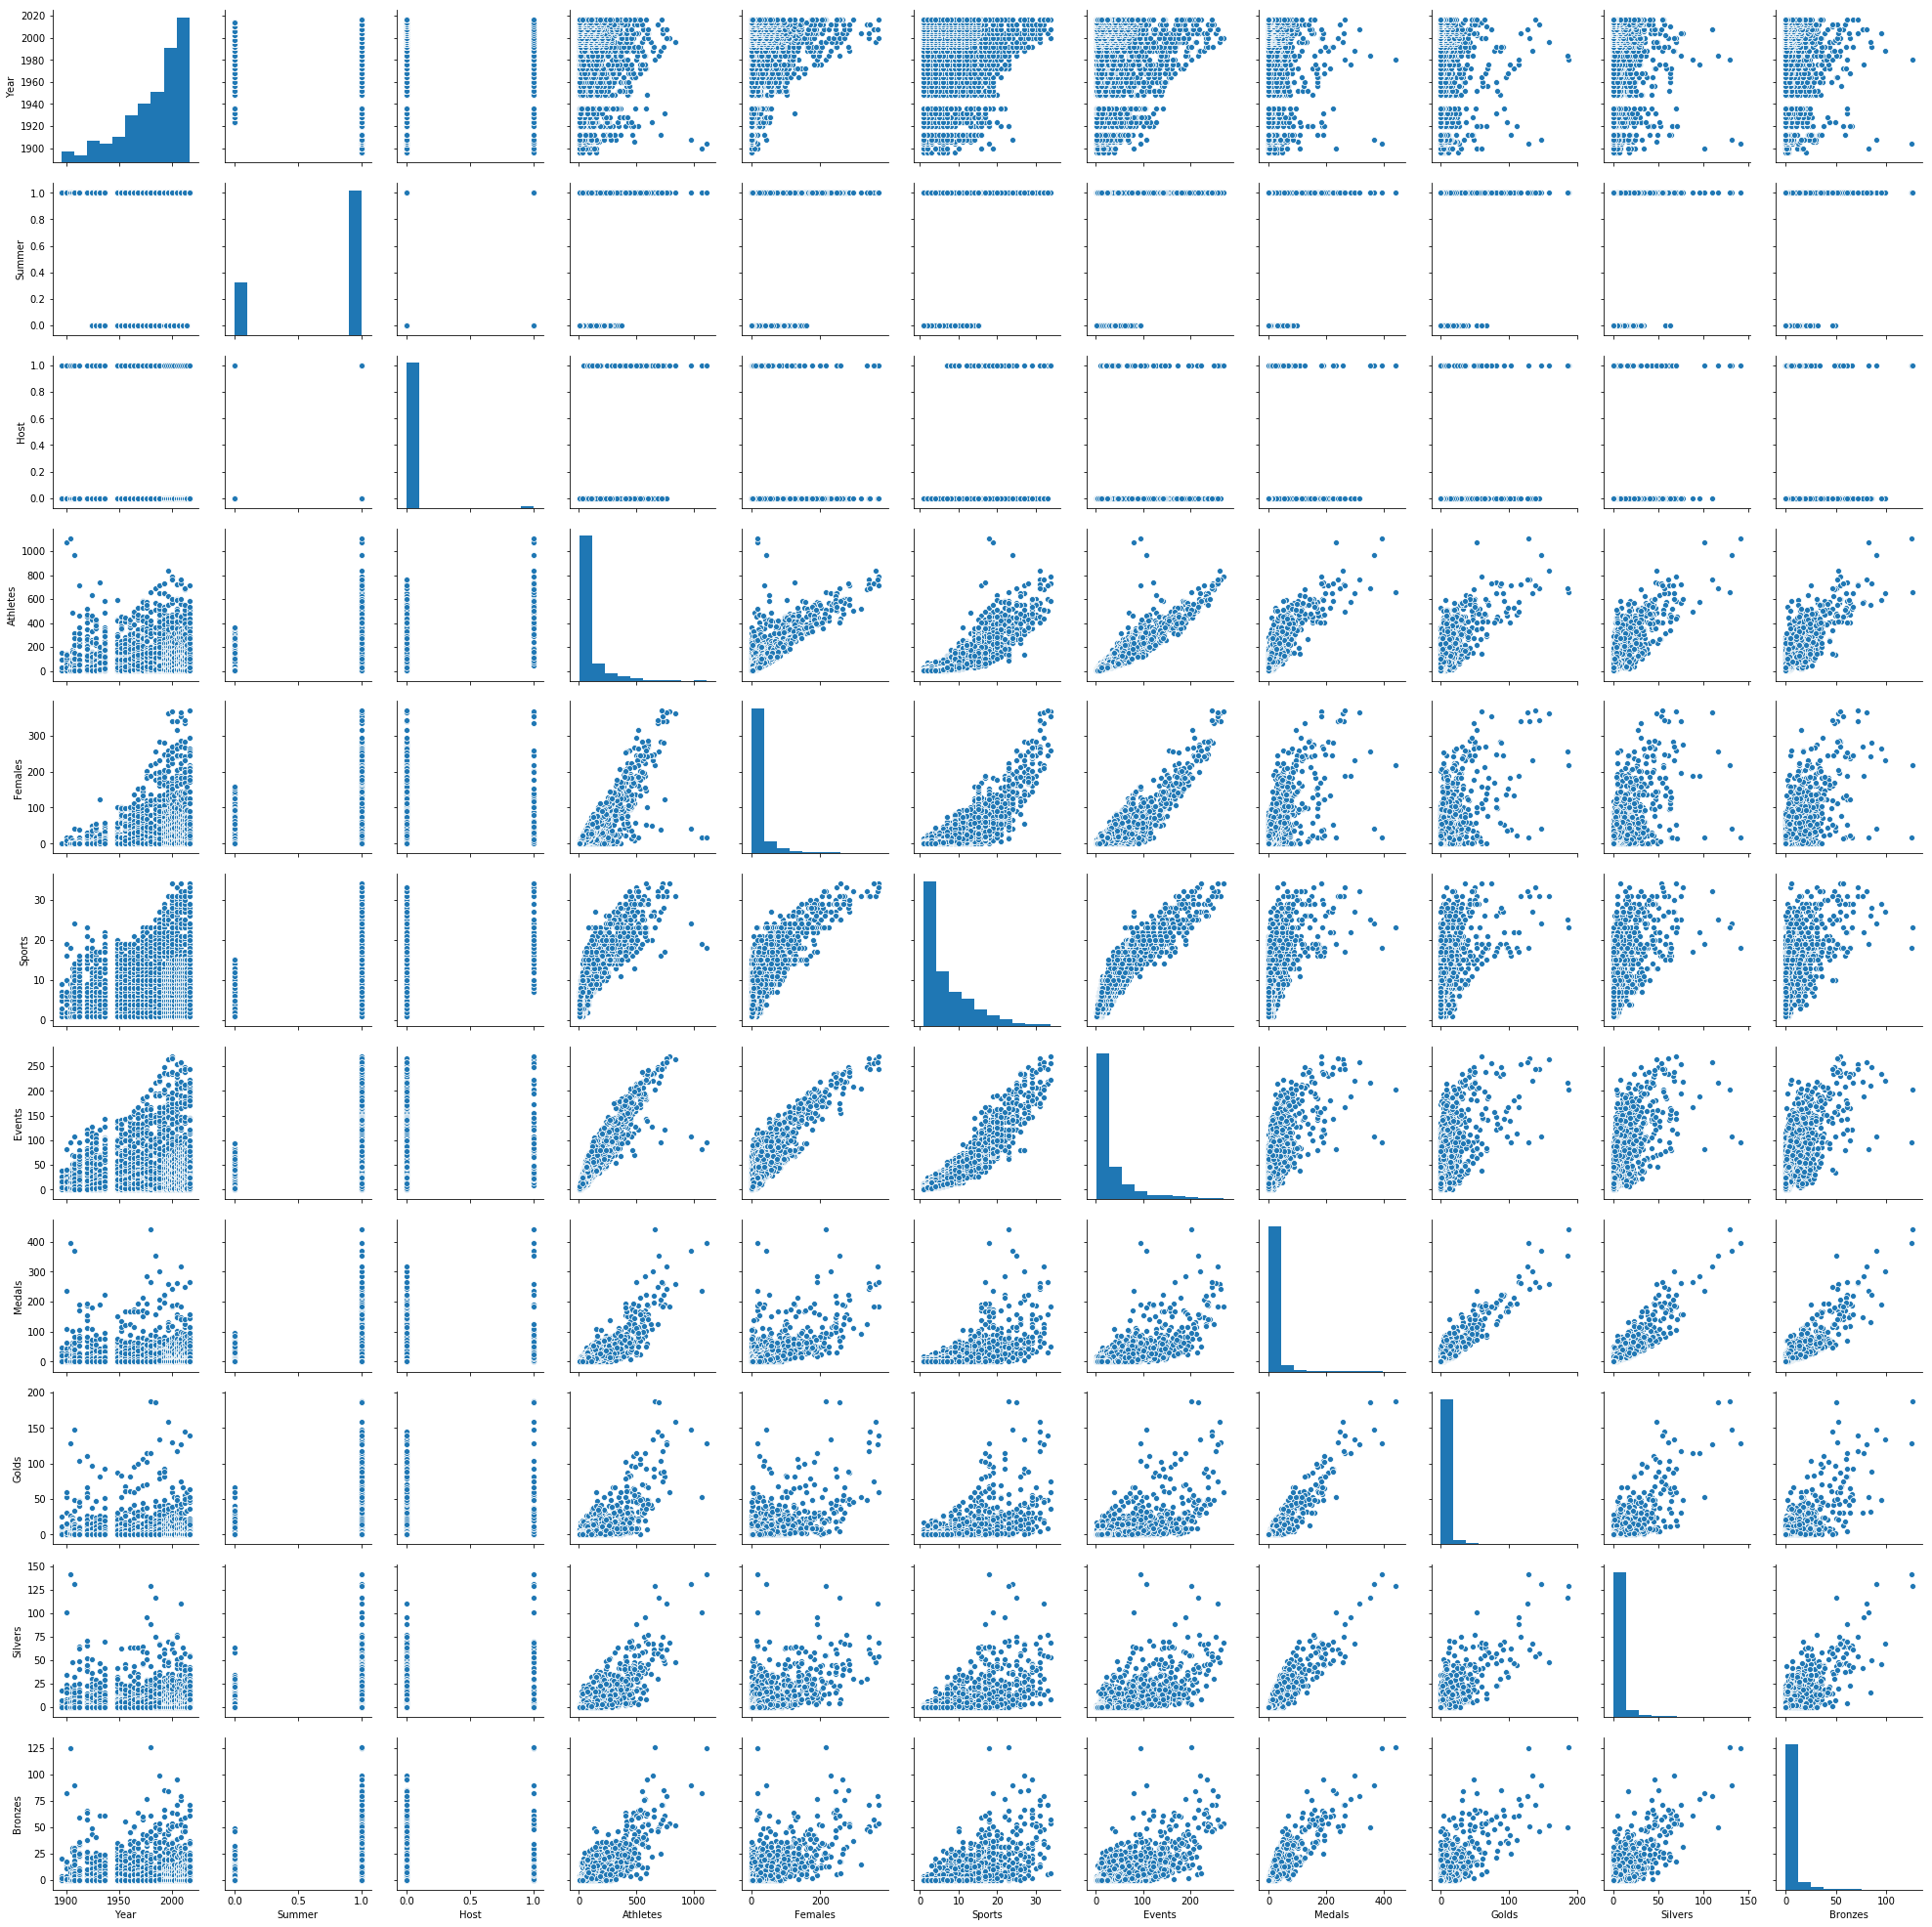

In [15]:
sns.pairplot(medals)
plt.show()

# Summer and Winter Games

# Host Advantage